In [1]:
import sys, os

project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)


In [4]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from src.data_loader import get_data_loaders
from src.evaluation import evaluate_model, compute_confusion_matrix


In [5]:
_, _, test_gen = get_data_loaders()


Found 23565 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


In [6]:
model = tf.keras.models.load_model("models/mobilenetv2_finetuned.h5")


In [7]:
metrics, y_true, y_pred = evaluate_model(model, test_gen)

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


235/235 [==============================] - 98s 412ms/step
Accuracy: 0.9941
Precision: 0.9931
Recall: 0.9952
F1-score: 0.9941


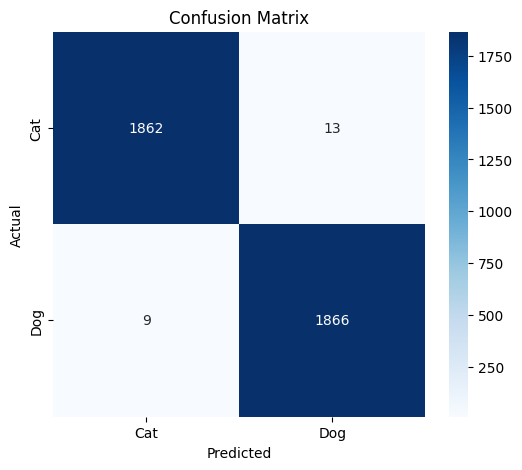

In [8]:
cm = compute_confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Cat", "Dog"],
    yticklabels=["Cat", "Dog"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("../reports/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()


### Model Evaluation

The final fine-tuned model was evaluated on a held-out test set using standard
classification metrics including accuracy, precision, recall, and F1-score.
These metrics provide a comprehensive assessment of the model’s performance on
unseen data.
